# Stock Analysis
### Sunpreet S. Chahal
 
##### Within this notebook, I will be analysing 6 securities; The Nasdaq composite (IXIC), Apple, Microsoft, Google and Facebook.
I will be analysing the historical price movements of each security; 

- Visualising the price fluctuations since the introduction of each IPO.

- Comparing each security for any similarities and differences.

- For any significant outliers, comment and provide reasonings for the anomly.

- Comment on the movement patterns of each security. 

#### Set-up

In [2]:
## Import libraries
import pandas as pd
import numpy as ny
import matplotlib.pyplot as mpy
import matplotlib as mtp
import seaborn as sns
import datetime as dt
#sns.set()

In [3]:
## Import Dataframe 
topstocks = pd.read_csv("D:\\PROJECTS\\Top 5 Stocks ✔\\big_five_stocks ORIGINAL.csv",encoding='ISO-8859-1',low_memory=False)

#Present Dataframe
topstocks.head(5)

,Unnamed: 0,name,open,close,high,low,volume
0,1971-02-05,^IXIC,100.00,100.00,100.00,100.00,0.0
1,1971-02-08,^IXIC,100.84,100.84,100.84,100.84,0.0
2,1971-02-09,^IXIC,100.76,100.76,100.76,100.76,0.0
3,1971-02-10,^IXIC,100.69,100.69,100.69,100.69,0.0
4,1971-02-11,^IXIC,101.45,101.45,101.45,101.45,0.0


In [4]:
##Present all columns for future reference 
topstocks.columns

Index(['Unnamed: 0', 'name', 'open', 'close', 'high', 'low', 'volume'], dtype='object')

In [5]:
##Let's view the top 5 stocks
topstocks.name.unique()

array(['^IXIC', 'AAPL', 'MSFT', 'AMZN', 'GOOGL', 'FB'], dtype=object)

### Data Cleaning & Manipulation

In [6]:
##Change column name
#Column#s one; 'Unnamed: 0', should be'Date'
topstocks = topstocks = topstocks.rename(columns={'Unnamed: 0': 'Date'}, inplace=False)
topstocks

,Date,name,open,close,high,low,volume
0,1971-02-05,^IXIC,100.00,100.00,100.00,100.00,0.0
1,1971-02-08,^IXIC,100.84,100.84,100.84,100.84,0.0
2,1971-02-09,^IXIC,100.76,100.76,100.76,100.76,0.0
3,1971-02-10,^IXIC,100.69,100.69,100.69,100.69,0.0
4,1971-02-11,^IXIC,101.45,101.45,101.45,101.45,0.0
...,...,...,...,...,...,...,...
41655,2019-08-23,MSFT,137.19,133.39,138.35,132.80,38515386.0
41656,2019-08-23,AAPL,209.43,202.64,212.05,201.00,46882843.0
41657,2019-08-23,GOOGL,1185.17,1153.58,1195.67,1150.00,1813141.0
41658,2019-08-23,AMZN,1793.03,1749.62,1804.90,1745.23,5277898.0


In [7]:
##Convert the 'Date' values into DateTime format
##EXAMPLE - df['DateColumn'] = pd.to_datetime(df['DateColumn'])
#This will allow me to break up the YYYYMMDD into - YYYY
topstocks['Date'] = pd.to_datetime(topstocks['Date'])
topstocks.head()

,Date,name,open,close,high,low,volume
0,1971-02-05,^IXIC,100.00,100.00,100.00,100.00,0.0
1,1971-02-08,^IXIC,100.84,100.84,100.84,100.84,0.0
2,1971-02-09,^IXIC,100.76,100.76,100.76,100.76,0.0
3,1971-02-10,^IXIC,100.69,100.69,100.69,100.69,0.0
4,1971-02-11,^IXIC,101.45,101.45,101.45,101.45,0.0


In [8]:
##Since I want a view of the price fluctuation over the years- to get a broader view
#EXAMPLE - df['Year'] = df['DateColumn'].dt.year
#Add new column to only contain YYYY values from 'Date'
topstocks['Year'] = topstocks['Date'].dt.year
topstocks

,Date,name,open,close,high,low,volume,Year
0,1971-02-05,^IXIC,100.00,100.00,100.00,100.00,0.0,1971
1,1971-02-08,^IXIC,100.84,100.84,100.84,100.84,0.0,1971
2,1971-02-09,^IXIC,100.76,100.76,100.76,100.76,0.0,1971
3,1971-02-10,^IXIC,100.69,100.69,100.69,100.69,0.0,1971
4,1971-02-11,^IXIC,101.45,101.45,101.45,101.45,0.0,1971
...,...,...,...,...,...,...,...,...
41655,2019-08-23,MSFT,137.19,133.39,138.35,132.80,38515386.0,2019
41656,2019-08-23,AAPL,209.43,202.64,212.05,201.00,46882843.0,2019
41657,2019-08-23,GOOGL,1185.17,1153.58,1195.67,1150.00,1813141.0,2019
41658,2019-08-23,AMZN,1793.03,1749.62,1804.90,1745.23,5277898.0,2019


In [9]:
#Replace any incorrect values
topstocks = topstocks.replace('^IXIC', 'IXIC')

In [10]:
##Check for null values
topstocks.isnull().sum()

Date      0
name      0
open      0
close     0
high      0
low       0
volume    0
Year      0
dtype: int64

### Data Visualisation

In [11]:
##Seperate the data by each stock
#These variables will be used for future analysis
nasdaq = topstocks.loc[topstocks['name'] == 'IXIC'].sort_values('Year')
aapl = topstocks.loc[topstocks['name'] == 'AAPL'].sort_values('Year')
msft = topstocks.loc[topstocks['name'] == 'MSFT'].sort_values('Year')
amzn = topstocks.loc[topstocks['name'] == 'AMZN'].sort_values('Year')
googl = topstocks.loc[topstocks['name'] == 'GOOGL'].sort_values('Year')
fb = topstocks.loc[topstocks['name'] == 'FB'].sort_values('Year')

amzn

,Date,name,open,close,high,low,volume,Year
13626,1997-05-15,AMZN,1.96,1.96,2.50,1.93,6006000.0,1997
14037,1997-10-10,AMZN,3.72,3.90,4.06,3.67,315600.0,1997
14041,1997-10-13,AMZN,3.98,4.00,4.04,3.93,67900.0,1997
14044,1997-10-14,AMZN,4.06,3.98,4.10,3.83,128900.0,1997
14049,1997-10-15,AMZN,3.97,3.92,3.97,3.77,196300.0,1997
...,...,...,...,...,...,...,...,...
41013,2019-03-22,AMZN,1810.17,1764.77,1818.98,1763.11,6362983.0,2019
41019,2019-03-25,AMZN,1757.79,1774.26,1782.68,1747.50,5103803.0,2019
41027,2019-03-26,AMZN,1793.00,1783.76,1805.77,1773.36,4865880.0,2019
41039,2019-03-28,AMZN,1770.00,1773.42,1777.93,1753.47,3042958.0,2019


In [12]:
##Extract the close prices of each stock, sorted by date (ascending)
##Extract the dates of each stock
#I will use this data to visualise the price change since the introduction of each IPO

nasdaqPr =nasdaq['close']
nasdaqDa =nasdaq['Year']

aaplPr = aapl['close']
aaplDa =aapl['Year']

msftPr = msft['close']
msftDa = msft['Year']

amznPr = amzn['close']
amznDa = amzn['Year']

googlPr = googl['close']
googlDa =googl['Year']
googlDate =googl['Date']

fbPr = fb['close']
fbDa =fb['Year']


#### Price correlation of all five stocks - Anually
We will be able to see the highest prices of each stock annually, tracking the progress and value of each security.

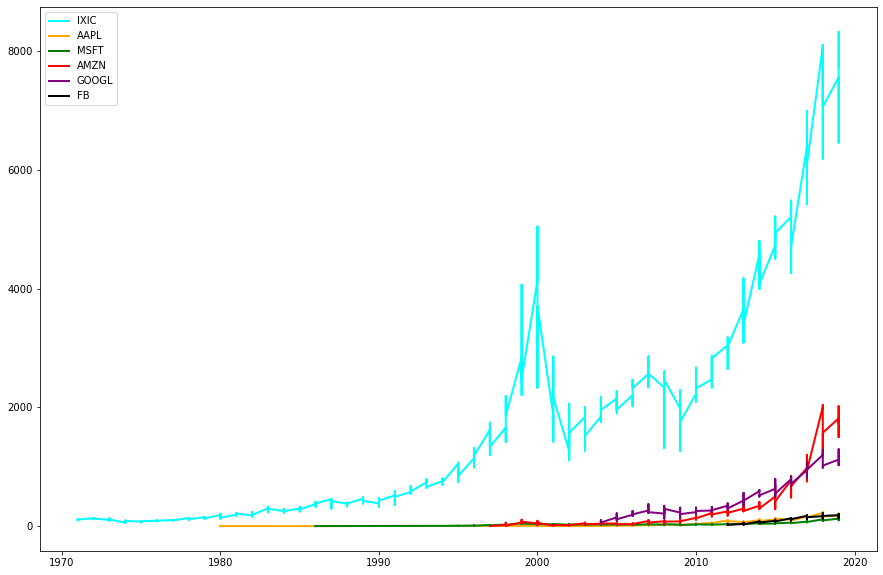

In [13]:
##IXIC AAPL MSFT AMZN GOOGL FB
#PrCh = Price Change 

mpy.figure(figsize=(15,10))
  
#Plot data
mpy.plot(nasdaqDa, nasdaqPr, linewidth = 2, color= 'cyan')
mpy.plot(aaplDa, aaplPr, linewidth = 2, color= 'orange')
mpy.plot(msftDa, msftPr, linewidth = 2, color= 'green')
mpy.plot(amznDa, amznPr, linewidth = 2, color= 'red')
mpy.plot(googlDa, googlPr, linewidth = 2, color= 'purple')
mpy.plot(fbDa, fbPr, linewidth = 2, color= 'black')

mpy.legend(['IXIC','AAPL','MSFT','AMZN','GOOGL','FB'], ncol=1, loc='upper left')


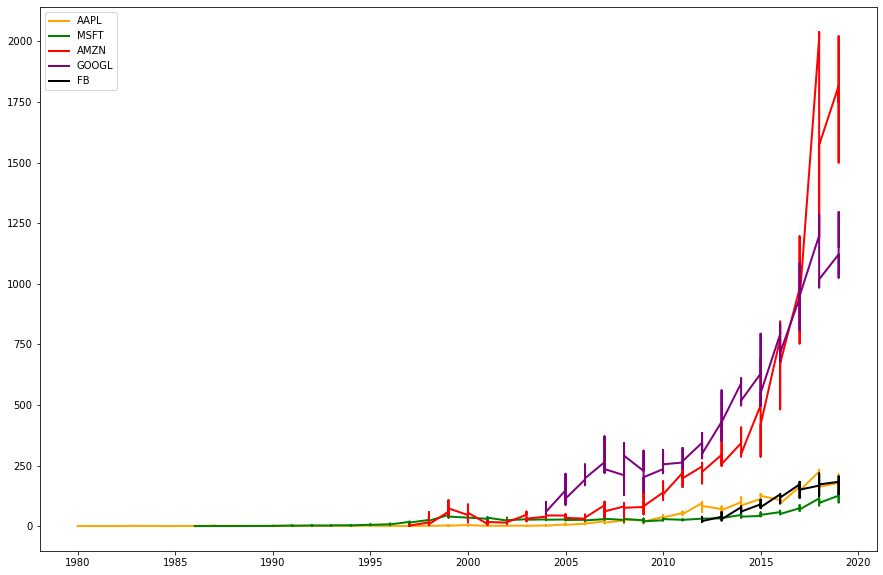

In [14]:
##AAPLE AMZN MSFT GOOGL FB
mpy.figure(figsize=(15,10))


#Plot data
mpy.plot(aaplDa, aaplPr, linewidth = 2, color= 'orange')
mpy.plot(msftDa, msftPr, linewidth = 2, color= 'green')
mpy.plot(amznDa, amznPr, linewidth = 2, color= 'red')
mpy.plot(googlDa, googlPr, linewidth = 2, color= 'purple')
mpy.plot(fbDa, fbPr, linewidth = 2, color= 'black')

mpy.legend(['AAPL','MSFT','AMZN','GOOGL','FB'], ncol=1, loc='upper left')


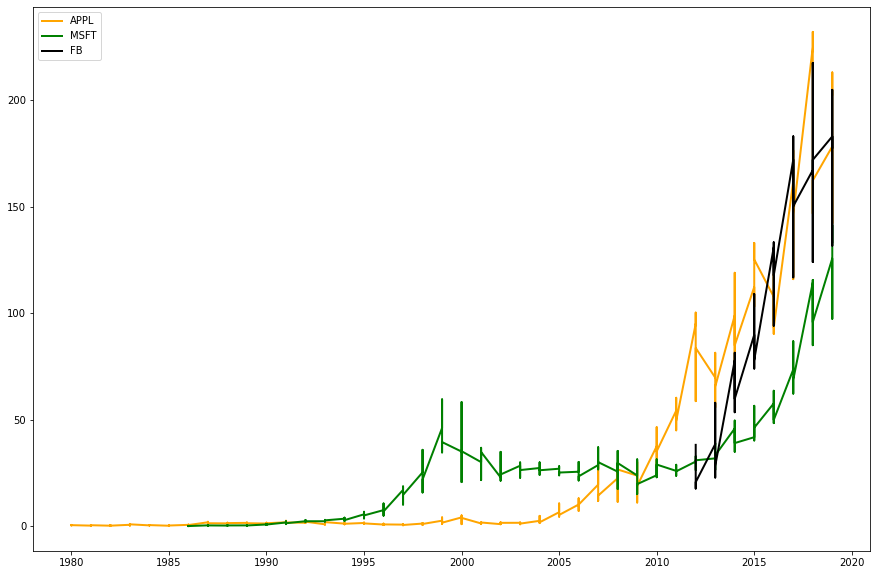

In [15]:
##AAPL MSFT FB 

mpy.figure(figsize=(15,10))

#Plot Data
mpy.plot(aaplDa, aaplPr, linewidth = 2, color= 'orange')
mpy.plot(msftDa, msftPr, linewidth = 2, color= 'green')
mpy.plot(fbDa, fbPr, linewidth = 2, color= 'black')

mpy.legend(['APPL','MSFT','FB'], ncol=1, loc='upper left')

The vertical lines represent the highest closing price and lowest closing price per annum. 

This provides both data regarding the volitily of each stock, presenting the highest closing and lowest closing prices per annum, showing the movement of each stock in detail. 
##### There are a few things that we can extract from the graphs above;
- There is an obvious outlier bwteen the five stocks that we're looking at; IXIC is The most expensive stock to buy, valued around ~ 8005.34 in August of 2019. 


- The movements of MSFT and APPL are very tight-knit, constantly crossing one another (in terms of share price) every year. This is the result of fierce comeptition; iOS vs WindowsOS for example, both sides constantly innovate their products and consistently deliver quality products. This healthly competition is highlighted through thier stock movement.


- All 6 securities have had a positive correlation, this is due to innovation unique to their industries and the market as a whole, and also by involving their products in the everday lives of the people (via IoT). For example, Amazon, they have become a household name for extremely fast and reliable deliveries for any product that you may want, aswell as delving into the entertainment market(gaming, TV and movies), resulting in their share prices rising.


#### Prices fluctuation per Ticker - Bar
The bar graph shows the closing price at the end of each year, not the highest/lowest closing price that may have been hit during the year. 

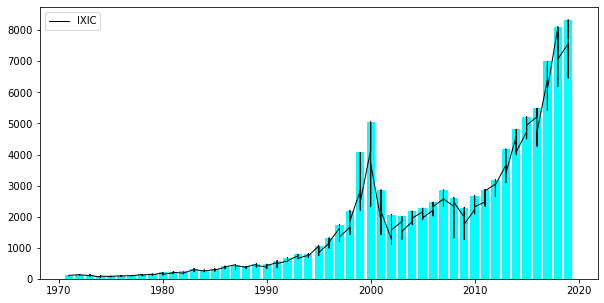

In [30]:
##Just IXIC
mpy.figure(figsize=(10,5))

#Plot data for IXIC
mpy.bar(nasdaqDa, nasdaqPr, linewidth = 2, color= 'cyan')
mpy.plot(nasdaqDa, nasdaqPr, linewidth = 1, color= 'black')

mpy.legend(['IXIC'], ncol=1, loc='upper left')

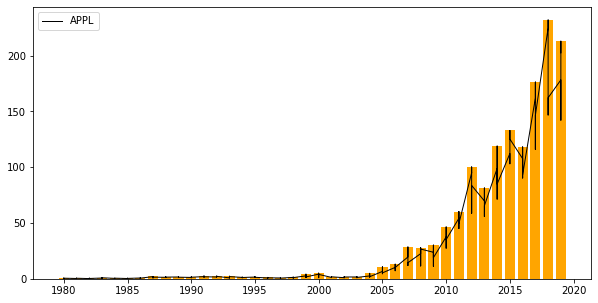

In [29]:
#Set Size
mpy.figure(figsize=(10,5))

#Plot Data for AAPL
mpy.bar(aaplDa, aaplPr, linewidth = 2, color= 'orange')
mpy.plot(aaplDa, aaplPr, linewidth = 1, color= 'black')

mpy.legend(['APPL'], ncol=1, loc='upper left')

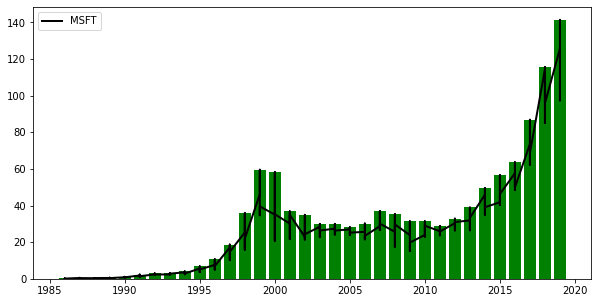

In [31]:
#Set Size
mpy.figure(figsize=(10,5))

#Plot data for MSFT
mpy.plot(msftDa, msftPr, linewidth = 2, color= 'black')
mpy.bar(msftDa, msftPr, linewidth = 1, color= 'green')

mpy.legend(['MSFT'], ncol=1, loc='upper left')

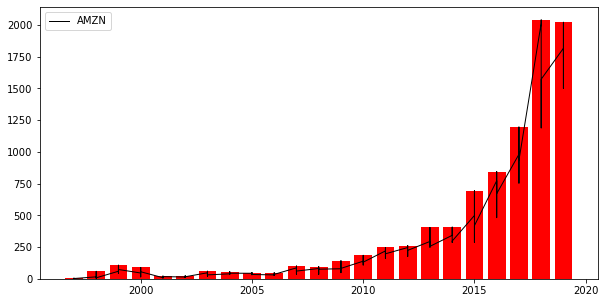

In [19]:
#Set Size
mpy.figure(figsize=(10,5))

#Plot data for GOOGL
mpy.bar(amznDa, amznPr, linewidth = 2, color= 'red')
mpy.plot(amznDa, amznPr, linewidth = 1, color= 'black')

mpy.legend(['AMZN'], ncol=1, loc='upper left')

We can extract some notable information from the graphs above.

All of the companies above were affected extremely negatively by the 2001 - 2002 DotCom bubble. In the years prior to bubble bursting, the whole market was rallying. The surge in bullish momentum enticed investors, both experience and amateur, to cash in - more cash flow within the stock market made the prices rally moreso. 
- the Nasdaq, for example, peaked at 5,131.7 in March 2000, dropping to 1,093.7 in September 2002 (a ~78% decrease). It took 13 years until 2015 for the Nasdaq to touch the mid 2000 price of 5,048.


- Apple was a much smaller company during the time of the DotCom bubble, price at 1.34 at the peak of the bubble, Apple gained alot of momentum during this period, however, growing at a rate of 340.68% from April 1999 to March 2000. Dropping to 0.26 in July 2002, though this mayn't seem like a huge amount of money, that was a drop of 80.9%. 


- Microsoft grew at a steadier pace compared to Apple, growing 51.4% from April 1999 to January 2000, though the price didn't surge like it did with Apple, 50% in the span of 9 months is extremely impressive. Dropping to 20.74 in July 2002, a 65.4% decline from the peak price of 60.07 at the peak of the bubble. 


- Amazon also grew extremely quickly during this period, rising from 40.75 in August 1999 to 113.21 in December 1999 - a growth of 177.81%. The burst of the bubble seemed to effect Amazon the worst, dropping to 5.43 in July 2002 - a rapid decline of 95.2%.

The growth in use of the internet for business & domestic used resulted in the majority of the market rallying very quickly (unnatural growth - not following growth patterns and movements from previous years). All companies that surged during this period fell just as quick as they grew, taking multiple years to reach the price they reached at the peak of the bubble.

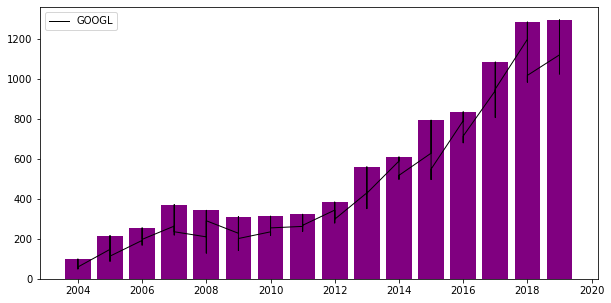

In [20]:
#Set Size
mpy.figure(figsize=(10,5))

#Plot data for FB
mpy.bar(googlDa, googlPr, linewidth = 2, color= 'purple')
mpy.plot(googlDa, googlPr, linewidth = 1, color= 'black')

mpy.legend(['GOOGL'], ncol=1, loc='upper left')

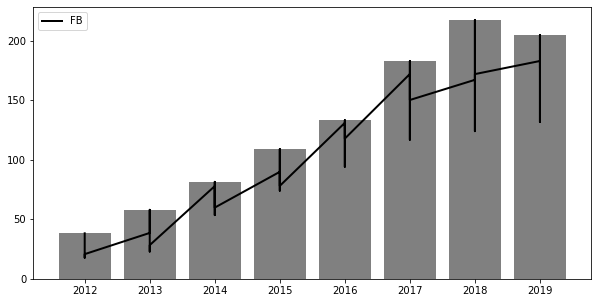

In [27]:
#Set Size
mpy.figure(figsize=(10,5))

#Plot data for FB
mpy.plot(fbDa, fbPr, linewidth = 2, color= 'black')
mpy.bar(fbDa, fbPr, linewidth = 1, color= 'grey')

mpy.legend(['FB'], ncol=1, loc='upper left')

Google and Facebook had their IPOs released in 2004 and 2012 respectively, so the damages caused by the DotCom bubble were limited. 

However, unlike Facebook, Google was effected by the 2008 financial crisis. Peaking at 374.9 during November 2007, and dropping to 124.5 in December 2008, a decline of 66.77%, as a result of the events at the time. 